Assignment 1: Feature Engineering and Visualization
Part 1: Data Preparation and Loading
Objective: Learn how to load and explore the dataset.



In [41]:
#Tasks:
#Download and load the dataset (e.g., ride_hailing_data.csv) into a Pandas DataFrame.
import pandas as pd

# Load the data
dataset = pd.read_csv('ride_hailing_data.csv')


In [42]:
#Print the first five rows of the dataset to get an overview of the data.
#print(dataset.head(10))
#Print a list of columns in the dataset to understand the features available.
print(dataset.columns)

Index(['Date/Time', 'Lat', 'Lon'], dtype='object')


Part 2: Feature Engineering
Objective: Create new features from existing data.

Tasks:

Create a new feature representing the hour of the day based on the Date/Time column. Convert the Date/Time column to a datetime object and extract the hour.
    

In [43]:
dataset['pickup_hour'] = pd.to_datetime(dataset['Date/Time']).dt.hour
print(dataset.columns)
print(dataset.head())


Index(['Date/Time', 'Lat', 'Lon', 'pickup_hour'], dtype='object')
             Date/Time      Lat      Lon  pickup_hour
0  2014-04-01 00:11:00  40.7690 -73.9549            0
1  2014-04-01 00:17:00  40.7267 -74.0345            0
2  2014-04-01 00:21:00  40.7316 -73.9873            0
3  2014-04-01 00:28:00  40.7588 -73.9776            0
4  2014-04-01 00:33:00  40.7594 -73.9722            0


Create a new feature that categorizes the time into "morning", "afternoon", "evening", and "night".
Use the pickup_hour column to create these categories.

In [49]:
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

dataset['time_of_day'] = dataset['pickup_hour'].apply(classify_time_of_day)

print(dataset.head())


             Date/Time      Lat      Lon  pickup_hour time_of_day
0  2014-04-01 00:11:00  40.7690 -73.9549            0       Night
1  2014-04-01 00:17:00  40.7267 -74.0345            0       Night
2  2014-04-01 00:21:00  40.7316 -73.9873            0       Night
3  2014-04-01 00:28:00  40.7588 -73.9776            0       Night
4  2014-04-01 00:33:00  40.7594 -73.9722            0       Night


Explore and print the unique values in the time_of_day column to ensure the categorization is correct.

In [51]:
print(dataset['time_of_day'].unique())


['Night' 'Morning' 'Afternoon' 'Evening']


Part 3: Data Visualization
Objective: Visualize the data to identify patterns and insights.

Tasks:

Create a graph showing the number of pickups per hour throughout the day.

Use the pickup_hour column to count the number of pickups for each hour.

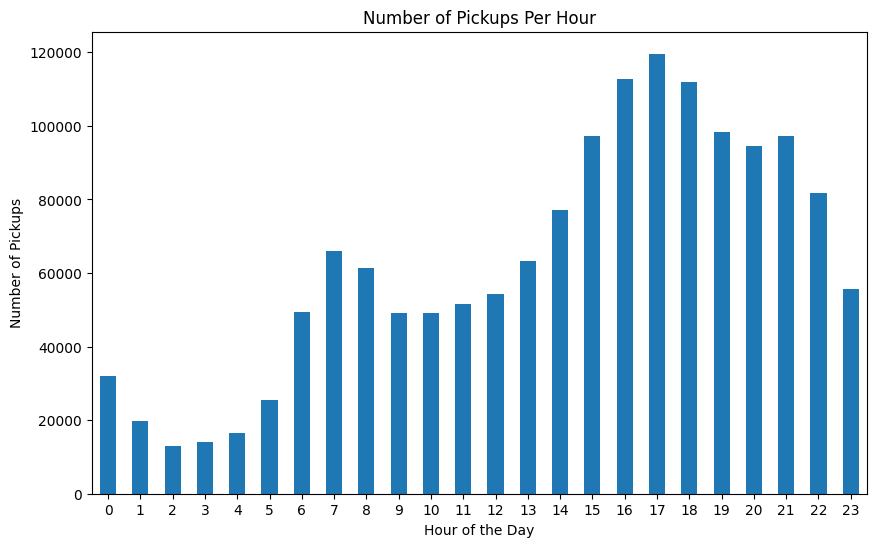

In [46]:
import matplotlib.pyplot as plt

pickups_per_hour = dataset['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
pickups_per_hour.plot(kind='bar')
plt.title('Number of Pickups Per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()


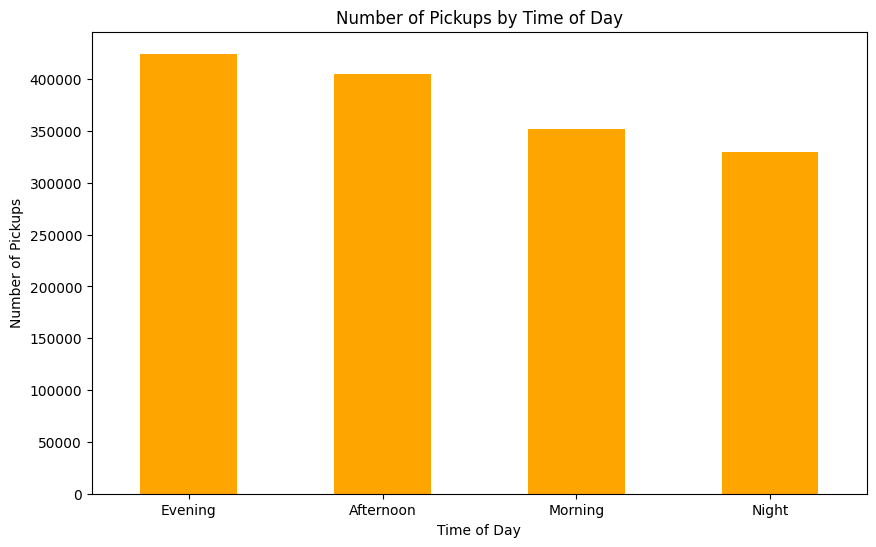

In [47]:
#Create a graph showing the distribution of pickups based on time_of_day.
pickups_per_time_of_day = dataset['time_of_day'].value_counts()

plt.figure(figsize=(10, 6))
pickups_per_time_of_day.plot(kind='bar', color='orange')
plt.title('Number of Pickups by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.show()



Part 4: Extended Exploration (Optional)
Objective: Encourage students to explore the dataset further on their own.

Tasks:

Explore the relationship between Lat (latitude) and Lon (longitude) to see if there are areas with high pickup density.

Create a scatter plot that visualizes where pickups occur based on these geographical coordinates.

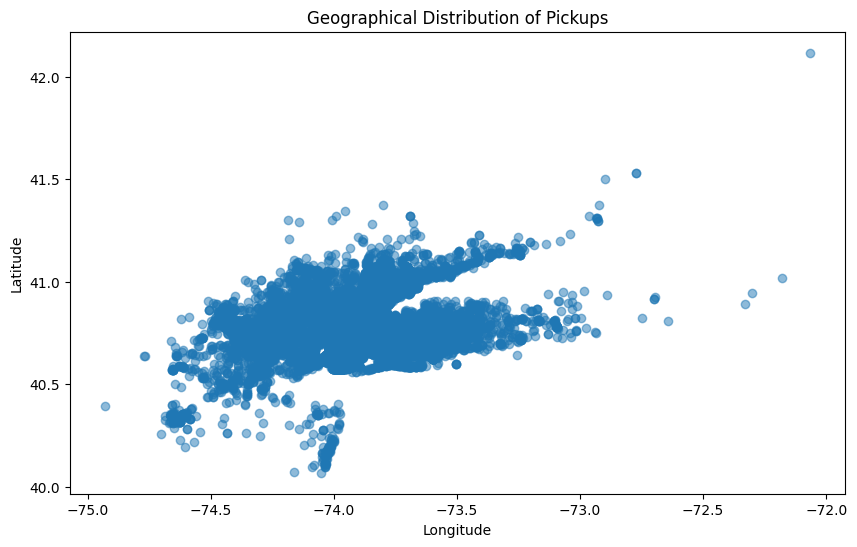

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset['Lon'], dataset['Lat'], alpha=0.5)
plt.title('Geographical Distribution of Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Investigate if there are any correlations between the time of day and geographical distribution by coloring the scatter plot based on time_of_day.